# Changing the symptom criteria:

In [28]:
import sys
sys.path.append('..')
import queueing_process.queueing_process as qp
import numpy.random as npr
import scipy.stats as ss 
import seaborn as sns
sns.set()

Currently, an individual is supposed to get tested when they have one of the following 3 symptoms; fever, anosmia or a persistent cough. Given that in the current situation where testing demand currently exceeds testing capacity, there is significant consideration being payed to how we might change these symptoms to make the situation better. The main idea, is to make the pre-test probability that an individual is infected with SARS-CoV-2 higher, in doing so, the overall level of testing efficiency is improved. If we were in the scenario where testing demand does not exceed testing capacity, we might consider relaxing symptom criteria, as somewhat less efficiency can be tolerated.

For example, we might ask that individuals have atleast 2 of the symptoms mentioned. Changing the symptom criteria has 2 key effects: it changed the probability that an individual with SARS-CoV-2 attempts to get a test, and it changes the probability that an individual who does not have SARS-CoV-2 gets a test.

We introduce two quantities; $E(D_P(t))$, the expected demand for tests from individuals infected with SARS-CoV-2, and $E(D_N(t))$, the expected demand from individuals who do not have have SARS-CoV-2. Both quantities are allowed to vary with time, however for the purposes of this ready reckoner, we do not vary them over time. Let $\alpha_P$ and $\alpha_N$ be the probability that someone who is infected with SARS-CoV-2 and something other than SARS-CoV-2 attempts to book a test, and let $I_P(t)$ and $I_N(t)$ be the number of individuals who have SARS-CoV-2 and non-SARS-CoV-2 infections. Then letting $I'_P(t)$ be the incidence rate, we take $E(D_P(t)) = \alpha_P^*f_P(I'_P(t))$, where the $f$ handles timeshifting and weighting of the incidence rate to produce the number of individuals on day $t$ who will ask for a test. We note that the $f$ is necessary due to a random time delay since the individuals were infected until they attempt to book a test, but the number of individuals attemting to book a test on day $t$ is highly related to the number of individuals who were infected on day $t-5$, hence why the incidence rate is used as a temporary proxy.

Under this set up, changing the symptom criteria amounts to providing new values for $(\alpha_p^*, \alpha_n^*)$. We use the asterisk to denote quantities that are associated with the new symptom criteria. Our objective function, is the numebr of individuals with SARS-CoV-2 who are successfully tested. We note that under the queuing process framework, the is a combination of the number of SARS-CoV-2 patients who ask for a test, and the number of those who are successfully tested (i.e, do not end up waiting in the queue for more than 7 days, recalling that we assume individuals are not tested if it has been more than 7 days since their symptom onset). Letting $\gamma(t, \alpha_p^*, \alpha_n^*) = P($Probability that an individual who joins the queue on day $t$ gets tested$|\alpha_p^*, \alpha_n^*)$, then our objective function is $g(\alpha_p^*, \alpha_n^*) = \int_0^T \alpha_p^*\gamma(t, \alpha_p^*, \alpha_n^*)$ dt.

We assume that the number of non-covid cases asking for a test is reduced by 20%. We assume that the number of covid cases asking for a test is reduced by 5%.

In [17]:
def symptom_onset_to_joining_queue():
    return round(npr.gamma(
        shape=2.62**2/2.38**2,
        scale=2.38**2/2.62))

def test_processing_delay_dist():
    return round(ss.gamma.rvs(a=4.941424, scale=0.266155))

In [14]:
mean_non_covid_demand = 1000
test_positivity = 0.16
covid_demand = round(mean_non_covid_demand * test_positivity / (1 - test_positivity) )
print(f'Covid demand: {covid_demand}')
daily_testing_capacity = 800

Covid demand: 190


In [15]:
mean_non_covid_demand_new_criteria = round(mean_non_covid_demand * 0.8)
print(f'New non-covid demand under new criteria: {mean_non_covid_demand_new_criteria}')
covid_demand_new_criteria = round(covid_demand * 0.95)
print(f'New covid demand under the new criteria: {covid_demand_new_criteria}')

New non-covid demand under new criteria: 800
New covid demand under the new criteria: 180


In [22]:
queueing_process_old_criteria = qp.queueing_process_deterministic(
    capacity=[daily_testing_capacity]*50,
    demand=[mean_non_covid_demand + covid_demand]*50,
    symptom_onset_to_joining_queue_dist=symptom_onset_to_joining_queue,
    test_processing_delay_dist=test_processing_delay_dist
)

queueing_process_new_criteria = qp.queueing_process_deterministic(
    capacity=[daily_testing_capacity]*50,
    demand=[mean_non_covid_demand_new_criteria + covid_demand_new_criteria]*50,
    symptom_onset_to_joining_queue_dist=symptom_onset_to_joining_queue,
    test_processing_delay_dist=test_processing_delay_dist
)

In [24]:
queueing_process_old_criteria.run_simulation()
queueing_process_new_criteria.run_simulation()

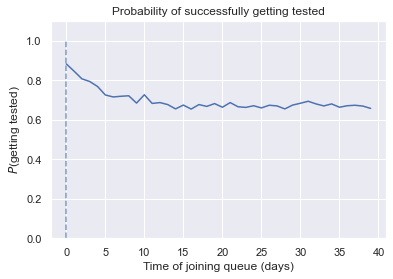

In [33]:
queueing_process_old_criteria.plot_prob_getting_tested()

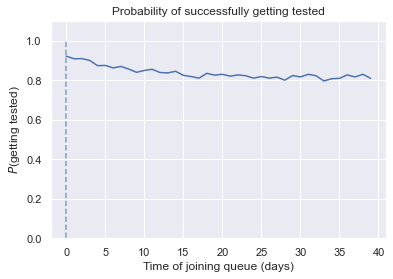

In [34]:
queueing_process_new_criteria.plot_prob_getting_tested()

In [38]:
mean_prob_getting_tested_new_critera = sum([queueing_process_new_criteria.get_prob_getting_tested(time) / 10 for time in range(20, 31)])
mean_prob_getting_tested_old_critera = sum([queueing_process_old_criteria.get_prob_getting_tested(time) / 10 for time in range(20, 31)])

In [41]:
mean_prob_getting_tested_new_critera * (0.95)

0.8543214285714285

In [42]:
mean_prob_getting_tested_old_critera

0.736218487394958